In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
train=pd.read_csv("GUIDE_Train.csv")
train=pd.DataFrame(train)

In [4]:
train[train.isnull().sum(axis=1)==1]

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,ActionGrouped,ActionGranular,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,EmailClusterId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,ThreatFamily,FileName,FolderPath,ResourceIdName,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City


In [5]:
#drop since more than 90lakh missing
train=train.drop(columns=['ResourceType','Roles','AntispamDirection','ThreatFamily','ActionGrouped','EmailClusterId','ActionGranular','MitreTechniques'])

In [6]:
# Count the number of NaN values in each column
null_counts = train.isnull().sum()

# Get columns with more than 100,000 NaNs
columns_with_nulls = null_counts[null_counts > 10000]

# Display the resulting columns
print(columns_with_nulls)


IncidentGrade       51340
SuspicionLevel    8072708
LastVerdict       7282572
dtype: int64


In [7]:
#drop since more than 1lakh missing
train=train.drop(columns=['LastVerdict','SuspicionLevel'])

In [8]:
#drop since more than 0.5lakh missing
train = train.dropna(subset=['IncidentGrade'])

In [9]:
# Count the number of NaN values in each column
null_counts = train.isnull().sum()

# Get columns with more than 100,000 NaNs
columns_with_nulls = null_counts[null_counts > 1]

# Display the resulting columns
print(columns_with_nulls)


Series([], dtype: int64)


In [10]:
train[train.isnull().any(axis=1)]

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City


In [11]:
train.head()

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,TruePositive,Ip,Related,98799,138268,27,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,31,6,3
1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,FalsePositive,User,Impacted,98799,138268,360606,160396,22406,23032,22795,24887,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630
2,1056561957389,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,FalsePositive,Url,Related,98799,138268,360606,68652,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630
3,1279900258736,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,BenignPositive,Url,Related,98799,138268,360606,13,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630
4,214748368522,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,TruePositive,User,Impacted,98799,138268,360606,160396,449,592,440,479,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630


In [12]:
train['OSFamily'].unique()

array([5, 0, 2, 1, 3, 4])

In [13]:
#since class imbalance (4 has only 1,3 has only 8,1 and 2 has 20k but cannot compete with 90 lakh)

In [14]:
train=train[train['OSFamily']!=0]

In [15]:
train=train[train['OSFamily']!=(2 or 3 or 4 or 0 or 1)]

In [16]:
train['OSFamily'].unique()

array([5, 1, 3, 4])

In [17]:
train['OSFamily'].describe()

count    9.275295e+06
mean     4.998826e+00
std      6.849859e-02
min      1.000000e+00
25%      5.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: OSFamily, dtype: float64

In [18]:
train=train.drop(columns=['OSFamily'])

In [19]:
unique_counts = train.nunique()

# Get columns with fewer than 10 unique values
columns_with_few_unique_values = unique_counts[unique_counts < 10].index.tolist()

# Display the resulting columns
print("Columns with fewer than 10 unique values:")
print(columns_with_few_unique_values)


Columns with fewer than 10 unique values:
['IncidentGrade', 'EvidenceRole']


In [20]:
train['EvidenceRole'].unique()

array(['Related', 'Impacted'], dtype=object)

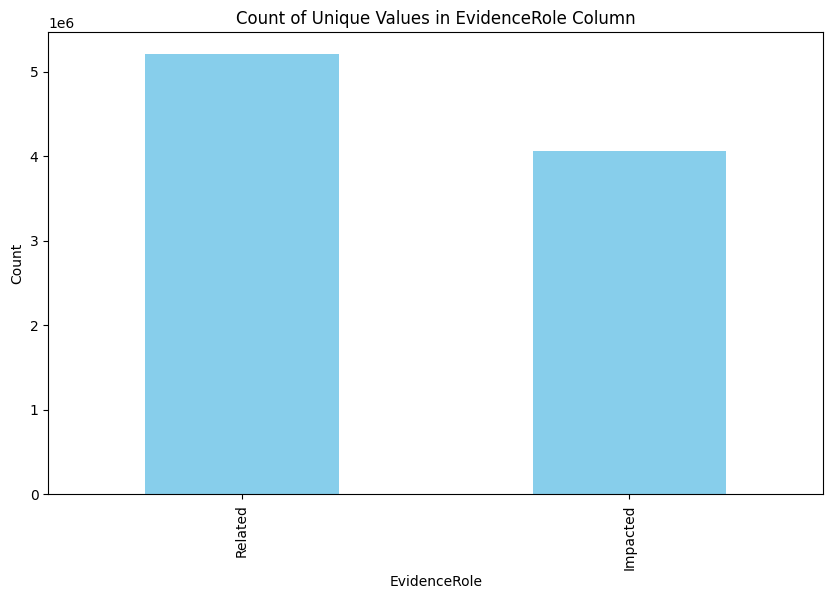

In [21]:

import matplotlib.pyplot as plt


oscode_counts = train['EvidenceRole'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))  # Set figure size
oscode_counts.plot(kind='bar', color='skyblue')

# Adding titles and labels
plt.title('Count of Unique Values in EvidenceRole Column')
plt.xlabel('EvidenceRole')
plt.ylabel('Count')
plt.show()


In [22]:
#not more biase so no need to do sampling techniques

In [23]:
train['OSVersion'].unique()

array([66,  2,  6, 21,  8, 22, 10,  9, 19, 20, 12, 25, 45, 41, 24, 58, 36,
       40, 59, 60])

In [24]:
# only one cell of a column
train=train.drop(columns=['OSVersion'])

In [25]:
train['State'].unique()

array([   6, 1445,   50, ..., 1144, 1285, 1432], shape=(1368,))

In [26]:
print(train.iloc[0,4])

2024-06-04T06:05:15.000Z


In [27]:
train['Timestamp'] = pd.to_datetime(train['Timestamp'])

# Create new columns: Date, Time, and possibly Timezone (or you can extract just date and time)
train['Date'] = train['Timestamp'].dt.date
train['Time'] = train['Timestamp'].dt.time
train['Timezone'] = train['Timestamp'].dt.tz 

In [28]:
len(train['Timezone'].unique())

1

In [29]:
# only one cell of a column
train=train.drop(columns=['Timezone'])

In [30]:
#since converted
train=train.drop(columns=['Timestamp'])

In [31]:
train

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,CountryCode,State,City,Date,Time
0,180388628218,0,612,123247,7,6,InitialAccess,TruePositive,Ip,Related,98799,138268,27,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,31,6,3,2024-06-04,06:05:15
1,455266534868,88,326,210035,58,43,Exfiltration,FalsePositive,User,Impacted,98799,138268,360606,160396,22406,23032,22795,24887,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,242,1445,10630,2024-06-14,03:01:25
2,1056561957389,809,58352,712507,423,298,InitialAccess,FalsePositive,Url,Related,98799,138268,360606,68652,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,242,1445,10630,2024-06-13,04:52:55
3,1279900258736,92,32992,774301,2,2,CommandAndControl,BenignPositive,Url,Related,98799,138268,360606,13,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,242,1445,10630,2024-06-10,16:39:36
4,214748368522,148,4359,188041,9,74,Execution,TruePositive,User,Impacted,98799,138268,360606,160396,449,592,440,479,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,242,1445,10630,2024-06-15,01:08:07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9516832,1056561956622,0,90,496631,7,6,InitialAccess,TruePositive,CloudLogonRequest,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,242,1445,10630,2024-06-08,15:26:08
9516833,1228360650033,59,196410,748366,2,2,CommandAndControl,BenignPositive,Url,Related,98799,138268,360606,164,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,242,1445,10630,2024-06-06,09:40:08
9516834,867583395122,44,14117,7425,78,57,Exfiltration,BenignPositive,MailMessage,Impacted,98799,138268,360606,160396,441377,270,425863,453297,153085,22919,1631,635,860,2251,3421,881,289573,117668,3586,242,1445,10630,2024-06-11,22:51:03
9516835,395136991850,43,644,8973,52,10,Impact,BenignPositive,Ip,Related,98799,138268,465,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,242,1445,10630,2024-05-20,23:01:01


 DATA CLEAN DONE FOR TRAIN CSV

In [32]:
test=pd.read_csv("GUIDE_Test.csv")
test=pd.DataFrame(test)
test

C:\Users\DELL\AppData\Local\Temp\ipykernel_7840\243737060.py:1: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  test=pd.read_csv("GUIDE_Test.csv")


,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,ActionGrouped,ActionGranular,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,EmailClusterId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,ThreatFamily,FileName,FolderPath,ResourceIdName,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,2610,3699,425863,863,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Private
1,1400159342154,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,NaN,BenignPositive,NaN,NaN,Machine,Impacted,1239,138268,360606,160396,441377,673934,425863,453297,2833,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,0,0,NaN,Suspicious,Suspicious,242,1445,10630,Public
2,1279900255923,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,T1021;T1027.002;T1027.005;T1105,BenignPositive,NaN,NaN,Process,Related,98799,4296,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,14,22,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Public
3,60129547292,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,NaN,NaN,CloudLogonSession,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4,515396080539,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,T1087;T1087.002,BenignPositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,133549,673934,425863,136104,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,Suspicious,5,66,NaN,NaN,NaN,242,1445,10630,Public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147987,541165881145,262,3017,227156,2024-06-04T03:53:15.000Z,139,120,InitialAccess,T1566.002,BenignPositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,13354,13012,13489,14567,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4147988,438086666953,1323,31001,304819,2024-06-04T19:32:19.000Z,219,196,InitialAccess,NaN,BenignPositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,95744,172717,96809,107151,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Private
4147989,1297080124487,47,3653,7243,2024-06-15T00:50:22.000Z,57,29,CommandAndControl,T1046;T1071;T1210,FalsePositive,NaN,NaN,Ip,Related,98799,138268,1084,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4147990,627065226886,70,4243,19142,2024-06-11T16:18:12.000Z,1,1,InitialAccess,T1566.002,BenignPositive,NaN,NaN,Mailbox,Impacted,98799,138268,360606,160396,53146,59351,53421,25428,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Private


In [33]:
test=test.drop(columns=['ResourceType','Roles','AntispamDirection','ThreatFamily','ActionGrouped','EmailClusterId','ActionGranular','MitreTechniques','OSVersion','LastVerdict','SuspicionLevel'])

In [34]:
test['OSFamily'].unique()

array([5, 0, 2, 1, 3])

In [35]:
test=test[test['OSFamily']!=0]

In [36]:
test=test.drop(columns=['OSFamily'])

In [37]:
test['Timestamp'] = pd.to_datetime(test['Timestamp'])

# Create new columns: Date, Time, and possibly Timezone (or you can extract just date and time)
test['Date'] = test['Timestamp'].dt.date
test['Time'] = test['Timestamp'].dt.time
test['Timezone'] = test['Timestamp'].dt.tz 

In [38]:
test=test.drop(columns=['Timestamp','Timezone'])

In [39]:
test

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,CountryCode,State,City,Usage,Date,Time
0,1245540519230,657,11767,87199,524,563,LateralMovement,BenignPositive,User,Impacted,98799,138268,360606,160396,2610,3699,425863,863,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,242,1445,10630,Private,2024-06-04,22:56:27
2,1279900255923,145,32247,131719,2932,10807,LateralMovement,BenignPositive,Process,Related,98799,4296,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,14,22,3586,242,1445,10630,Public,2024-06-08,03:20:49
3,60129547292,222,15294,917686,0,0,InitialAccess,FalsePositive,CloudLogonSession,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,242,1445,10630,Public,2024-06-12,12:07:31
4,515396080539,363,7615,5944,27,18,Discovery,BenignPositive,User,Impacted,98799,138268,360606,160396,133549,673934,425863,136104,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,242,1445,10630,Public,2024-06-06,17:42:05
5,670014899930,0,238,378946,0,0,InitialAccess,TruePositive,User,Impacted,98799,138268,360606,160396,2544,3392,2558,2696,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,242,1445,10630,Public,2024-06-06,08:10:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147987,541165881145,262,3017,227156,139,120,InitialAccess,BenignPositive,User,Impacted,98799,138268,360606,160396,13354,13012,13489,14567,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,242,1445,10630,Public,2024-06-04,03:53:15
4147988,438086666953,1323,31001,304819,219,196,InitialAccess,BenignPositive,User,Impacted,98799,138268,360606,160396,95744,172717,96809,107151,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,242,1445,10630,Private,2024-06-04,19:32:19
4147989,1297080124487,47,3653,7243,57,29,CommandAndControl,FalsePositive,Ip,Related,98799,138268,1084,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,242,1445,10630,Public,2024-06-15,00:50:22
4147990,627065226886,70,4243,19142,1,1,InitialAccess,BenignPositive,Mailbox,Impacted,98799,138268,360606,160396,53146,59351,53421,25428,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,242,1445,10630,Private,2024-06-11,16:18:12


In [40]:
train

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,CountryCode,State,City,Date,Time
0,180388628218,0,612,123247,7,6,InitialAccess,TruePositive,Ip,Related,98799,138268,27,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,31,6,3,2024-06-04,06:05:15
1,455266534868,88,326,210035,58,43,Exfiltration,FalsePositive,User,Impacted,98799,138268,360606,160396,22406,23032,22795,24887,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,242,1445,10630,2024-06-14,03:01:25
2,1056561957389,809,58352,712507,423,298,InitialAccess,FalsePositive,Url,Related,98799,138268,360606,68652,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,242,1445,10630,2024-06-13,04:52:55
3,1279900258736,92,32992,774301,2,2,CommandAndControl,BenignPositive,Url,Related,98799,138268,360606,13,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,242,1445,10630,2024-06-10,16:39:36
4,214748368522,148,4359,188041,9,74,Execution,TruePositive,User,Impacted,98799,138268,360606,160396,449,592,440,479,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,242,1445,10630,2024-06-15,01:08:07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9516832,1056561956622,0,90,496631,7,6,InitialAccess,TruePositive,CloudLogonRequest,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,242,1445,10630,2024-06-08,15:26:08
9516833,1228360650033,59,196410,748366,2,2,CommandAndControl,BenignPositive,Url,Related,98799,138268,360606,164,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,242,1445,10630,2024-06-06,09:40:08
9516834,867583395122,44,14117,7425,78,57,Exfiltration,BenignPositive,MailMessage,Impacted,98799,138268,360606,160396,441377,270,425863,453297,153085,22919,1631,635,860,2251,3421,881,289573,117668,3586,242,1445,10630,2024-06-11,22:51:03
9516835,395136991850,43,644,8973,52,10,Impact,BenignPositive,Ip,Related,98799,138268,465,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,242,1445,10630,2024-05-20,23:01:01


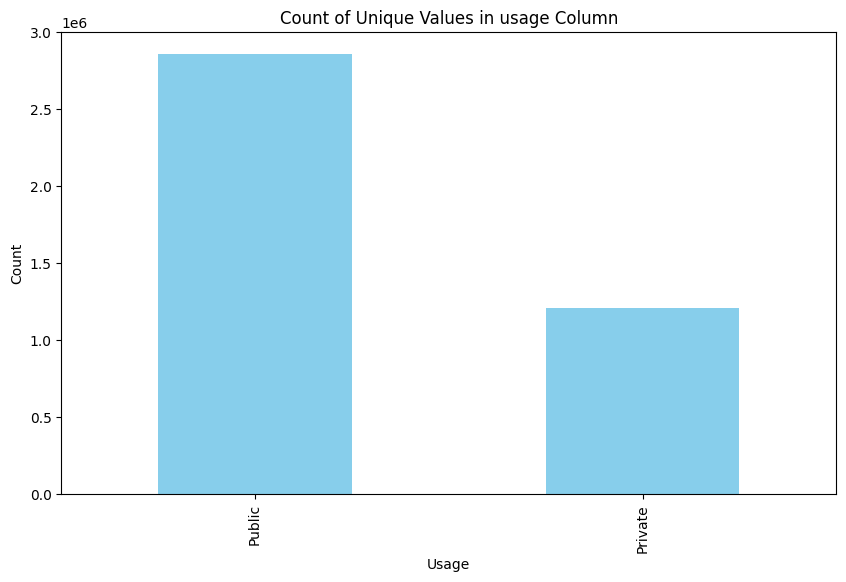

In [41]:
oscode_counts = test['Usage'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))  # Set figure size
oscode_counts.plot(kind='bar', color='skyblue')

# Adding titles and labels
plt.title('Count of Unique Values in usage Column')
plt.xlabel('Usage')
plt.ylabel('Count')
plt.show()

In [42]:
len(test[test['Usage']=="Private"])

1206645

In [43]:
categories_to_downsample = ['Public', 'Private']

# Define the number of samples you want per category (e.g., 2)
num_samples_per_category = 1205925

# Downsample in the specified categories
downsampled_test = test[test['Usage'].isin(categories_to_downsample)] \
                       .groupby('Usage') \
                       .apply(lambda x: x.sample(n=num_samples_per_category, random_state=1)) \
                       .reset_index(drop=True)

# Display the downsampled DataFrame
print(downsampled_test)

C:\Users\DELL\AppData\Local\Temp\ipykernel_7840\1784434644.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=num_samples_per_category, random_state=1)) \


                    Id  OrgId  IncidentId  AlertId  DetectorId  AlertTitle  \
0        1374389534747      6        2315     1363          17         106   
1         824633722975     19         673     2362          23          16   
2        1151051240525    365       25622   668847         433         457   
3         360777253693     61      141225  1074993           5          31   
4         979252545704    849       16739     8423           1           1   
...                ...    ...         ...      ...         ...         ...   
2411845   506806143854   1593      148269   644394        2417       26033   
2411846    34359740928      5        1209    85550           0           0   
2411847  1468878819341     20        2385     1248          79        1399   
2411848   549755818350     71       10277     4949         487          24   
2411849  1382979471128      0         297   387999           0           0   

                   Category   IncidentGrade         EntityType 

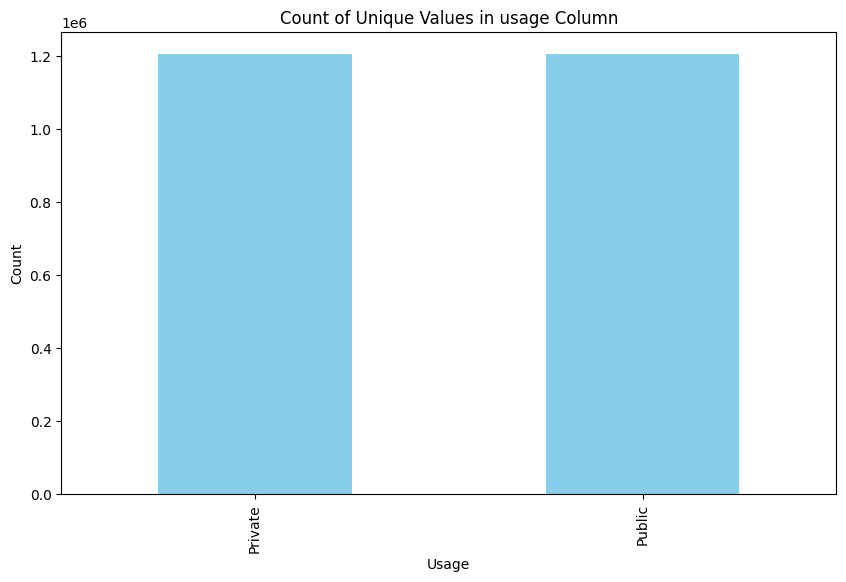

In [44]:
oscode_counts = downsampled_test['Usage'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))  # Set figure size
oscode_counts.plot(kind='bar', color='skyblue')

# Adding titles and labels
plt.title('Count of Unique Values in usage Column')
plt.xlabel('Usage')
plt.ylabel('Count')
plt.show()

In [45]:
downsampled_test

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,CountryCode,State,City,Usage,Date,Time
0,1374389534747,6,2315,1363,17,106,Impact,BenignPositive,Ip,Related,98799,138268,1292,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,242,1445,10630,Private,2024-05-24,02:50:31
1,824633722975,19,673,2362,23,16,CommandAndControl,BenignPositive,Url,Related,98799,138268,360606,2403,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,242,1445,10630,Private,2024-06-06,09:17:38
2,1151051240525,365,25622,668847,433,457,InitialAccess,FalsePositive,MailMessage,Related,98799,138268,360606,160396,441377,79113,425863,453297,153085,159694,1631,635,860,2251,3421,881,289573,117668,3586,242,1445,10630,Private,2024-06-06,23:22:17
3,360777253693,61,141225,1074993,5,31,SuspiciousActivity,BenignPositive,CloudApplication,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,0,0,881,289573,117668,3586,242,1445,10630,Private,2024-06-10,10:27:53
4,979252545704,849,16739,8423,1,1,InitialAccess,BenignPositive,User,Impacted,98799,138268,360606,160396,42142,50783,46485,48995,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,242,1445,10630,Private,2024-06-13,10:52:13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2411845,506806143854,1593,148269,644394,2417,26033,Exfiltration,FalsePositive,MailMessage,Impacted,98799,138268,360606,160396,441377,101529,425863,453297,153085,169142,1631,635,860,2251,3421,881,289573,117668,3586,242,1445,10630,Public,2024-06-12,13:43:04
2411846,34359740928,5,1209,85550,0,0,InitialAccess,TruePositive,CloudLogonRequest,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,242,1445,10630,Public,2024-06-05,01:47:42
2411847,1468878819341,20,2385,1248,79,1399,Impact,FalsePositive,Ip,Related,98799,138268,2361,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,242,1445,10630,Public,2024-05-23,06:43:56
2411848,549755818350,71,10277,4949,487,24,CredentialAccess,FalsePositive,Ip,Related,98799,138268,183293,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,242,1445,10630,Public,2024-06-04,06:48:20


In [46]:
test=downsampled_test
test=test.drop(columns=["Usage"])

In [47]:
test.columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'DeviceId',
       'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'CountryCode', 'State', 'City', 'Date',
       'Time'],
      dtype='object')

In [48]:
train.columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'DeviceId',
       'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'CountryCode', 'State', 'City', 'Date',
       'Time'],
      dtype='object')

* test cleaned

# _MODEL BUILD_

In [49]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report

# Prepare features and target
X = train.drop(columns=['IncidentGrade'])
y = train['IncidentGrade']

# Step 3: Sample the Dataset
# Sample 10% of the data for quick testing
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=0.1, random_state=42)

# Step 4: Split the Sampled Data
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# Step 5: Preprocessing and Training
# Create a preprocessor to handle categorical data
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

# Pipeline for SGD Classifier
pipeline = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])),
    ('classifier', SGDClassifier(max_iter=1000, random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Step 6: Evaluate the Model
y_pred = pipeline.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

                precision    recall  f1-score   support

BenignPositive       0.64      0.88      0.74     80205
 FalsePositive       0.86      0.19      0.32     40257
  TruePositive       0.67      0.68      0.68     65044

      accuracy                           0.66    185506
     macro avg       0.72      0.58      0.58    185506
  weighted avg       0.70      0.66      0.63    185506



In [50]:
# Step 1: Import Libraries

from sklearn.linear_model import LogisticRegression


# Step 2: Load Your DataFrame
# Assuming `train` is  DataFrame already loaded.

# Prepare features and target
X = train.drop(columns=['IncidentGrade'])
y = train['IncidentGrade']

# Step 3: Sample the Dataset
# Sample 5% of the data for quicker testing
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=0.05, random_state=42)  # Reduced sample size

# Step 4: Split the Sampled Data
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# Step 5: Preprocessing and Training
# Create a preprocessor to handle categorical data
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

# Pipeline for Logistic Regression
pipeline_lr = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))  # Allow maximum iterations to converge
])

# Train the model
pipeline_lr.fit(X_train, y_train)

# Step 6: Evaluate the Model
y_pred = pipeline_lr.predict(X_test)
print("Classification Report for Logistic Regression:\n")
print(classification_report(y_test, y_pred))


Classification Report for Logistic Regression:

                precision    recall  f1-score   support

BenignPositive       0.71      0.81      0.76     40094
 FalsePositive       0.70      0.43      0.53     19896
  TruePositive       0.70      0.75      0.72     32763

      accuracy                           0.71     92753
     macro avg       0.71      0.66      0.67     92753
  weighted avg       0.71      0.71      0.70     92753



<Figure size 1000x700 with 0 Axes>

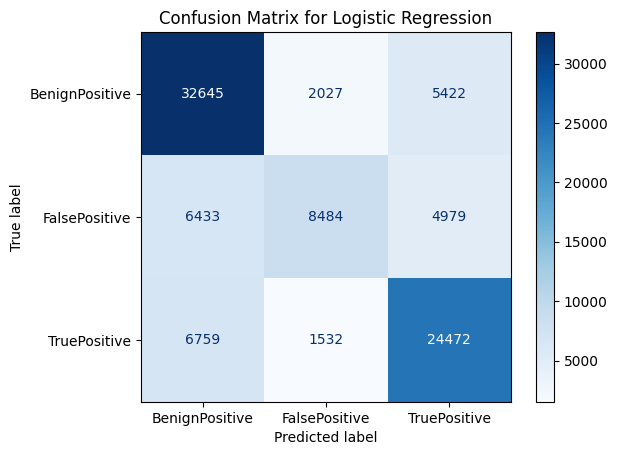

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 2: Create confusion matrix display
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline_lr.classes_)

# Step 3: Plot the confusion matrix
plt.figure(figsize=(10, 7))
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


Classification Report for Decision Tree Classifier:

                precision    recall  f1-score   support

BenignPositive       0.59      0.74      0.66     40094
 FalsePositive       0.86      0.07      0.12     19896
  TruePositive       0.55      0.68      0.61     32763

      accuracy                           0.58     92753
     macro avg       0.66      0.50      0.46     92753
  weighted avg       0.63      0.58      0.52     92753



<Figure size 1000x700 with 0 Axes>

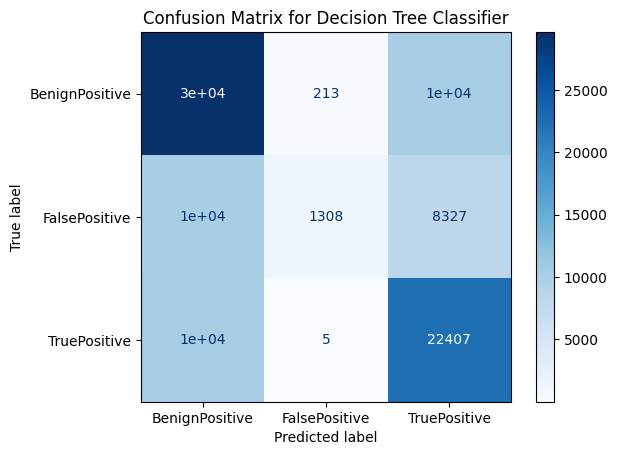

In [54]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 2: Load Your DataFrame
# Assuming `train` is your DataFrame already loaded.
# Example Data Loading (replace this with your actual DataFrame)
# train = pd.read_csv('your_dataset.csv')

# Prepare features and target
X = train.drop(columns=['IncidentGrade'])
y = train['IncidentGrade']

# Step 3: Sample the Dataset
# Sample 5% of the data for quicker testing
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=0.05, random_state=42)

# Step 4: Split the Sampled Data
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# Step 5: Preprocessing and Training
# Create a preprocessor to handle categorical data
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

# Pipeline for Simple Decision Tree Classifier
pipeline_dt = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])),
    ('classifier', DecisionTreeClassifier(max_depth=3, random_state=42))  # Limit the depth for simplicity
])

# Train the model
pipeline_dt.fit(X_train, y_train)

# Step 6: Evaluate the Model
y_pred = pipeline_dt.predict(X_test)
print("Classification Report for Decision Tree Classifier:\n")
print(classification_report(y_test, y_pred))

# Step 7: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline_dt.classes_)
plt.figure(figsize=(10, 7))
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()


* for test data set

In [52]:
# Step 1: Import Libraries

from sklearn.linear_model import LogisticRegression


# Step 2: Load Your DataFrame
# Assuming `train` is  DataFrame already loaded.

# Prepare features and target
X = test.drop(columns=['IncidentGrade'])
y = test['IncidentGrade']

# Step 3: Sample the Dataset
# Sample 5% of the data for quicker testing
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=0.05, random_state=42)  # Reduced sample size

# Step 4: Split the Sampled Data
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# Step 5: Preprocessing and Training
# Create a preprocessor to handle categorical data
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

# Pipeline for Logistic Regression
pipeline_lr = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))  # Allow maximum iterations to converge
])

# Train the model
pipeline_lr.fit(X_train, y_train)

# Step 6: Evaluate the Model
y_pred = pipeline_lr.predict(X_test)
print("Classification Report for Logistic Regression:\n")
print(classification_report(y_test, y_pred))


Classification Report for Logistic Regression:

                precision    recall  f1-score   support

BenignPositive       0.71      0.83      0.76     10130
 FalsePositive       0.79      0.40      0.53      5156
  TruePositive       0.70      0.77      0.73      8833

      accuracy                           0.71     24119
     macro avg       0.73      0.66      0.68     24119
  weighted avg       0.72      0.71      0.70     24119



<Figure size 1000x700 with 0 Axes>

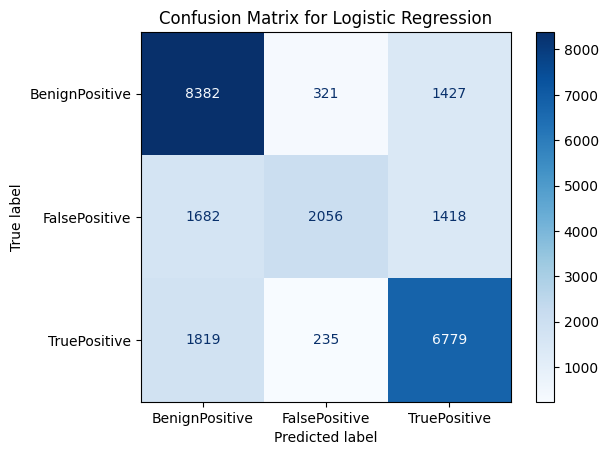

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 2: Create confusion matrix display
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline_lr.classes_)

# Step 3: Plot the confusion matrix
plt.figure(figsize=(10, 7))
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression')
plt.show()
